In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp
sp.init_printing(print_builtin=True)
import tinyarray as ta
import qsymm

# QSYMM: https://gitlab.kwant-project.org/qt/qsymm
# Paper: https://arxiv.org/abs/1806.08363

# PointGroupElement, INPUT:
# 1 - matrix acting on r-space (must be integer numpy-array or a sympy-matrix)
# 2 - true/false = antiunitary (such as time reversal or particle-hole)
# 3 - true/false = antisymmetry (such as particle-hole or chiral)
# 4 - matrix acting on psi-space (numpy)

# Pauli matrices
s0 = np.array([[1, 0],[0, 1]])
sx = np.array([[0, 1],[1, 0]])
sy = np.array([[0, -1j],[1j, 0]])
sz = np.array([[1, 0],[0, -1]])
zr = 0*s0 # 2x2 zero

## Graphene nanoribbons

Symmetry: $D_{2h} = \{e, M_x, M_y, M_z, i, C_{2x}, C_{2y}, C_{2z}\}$

Generators: $\{M_x, M_y, M_z\}$

Total wave-function expansion:

$\psi(r) = f_A   \Big[e^{i\vec{ q}\cdot\vec{r}}\,\varphi_A(r)\Big] + f_B   \Big[e^{i\vec{ q}\cdot\vec{r}}\,\varphi_B(r)\Big] + f_{A'} \Big[e^{i\vec{q}'\cdot\vec{r}}\,\varphi_{A'}(r)\Big] + f_{B'} \Big[e^{i\vec{q}'\cdot\vec{r}}\,\varphi_{B'}(r)\Big]$

With $\vec{q} = \vec{k} + K\hat{y}$, $\vec{q}' = \vec{k} - K\hat{y}$, where $\pm K$ labels the K-valley projections into zigzag's $k_y$.

Our goal is to find $H_{eff}$, such that $H_{eff} F = \varepsilon F$, where $F = \{f_A, f_B, f_{A'}, f_{B'}\}$. So, the basis functions are those between $[\cdots]$.

The $C_{2v}$ operations do not mix $K$ and $K'$, thus they are block-diagonal. The chiral operator identifies the A and B lattice, and it is also block-diagonal. All symmetries are defined at $\vec{k} = 0$, thus the exponentials in $\psi$ are simply $e^{i\vec{q}\cdot\vec{r}} = e^{i K y}$ and $e^{i\vec{q}'\cdot\vec{r}} = e^{-i K y}$. Thus, we get

$M_z = \tau_0 \otimes (-\sigma_0)$

$M_x = -\tau_0 \otimes \sigma_y$

$\mathcal{C} = \tau_0 \otimes \sigma_z$

The $M_y$ generator for $D_{2h}$ mixes $K$ and $K'$, thus yielding

$M_y = \tau_x \otimes \sigma_0$

Since our system is spinless, the time-reversal is simply T = (complex conjugation) and sign change in momentum, which takes $A \rightarrow A'$, $B \rightarrow -B'$, $i\vec{q} \rightarrow i\vec{q}'$. Thus, it mixes $K$ and $K'$ valleys:

$T = \tau_x \otimes \sigma_z \mathcal{K}$

On the r-basis, these all follow from SO(2).

### Bulding the QSymm symmetry operators

In [2]:
# Mz
pU = np.block([[-s0,zr],[zr,-s0]]) # wave-function basis
pR = s0 # r-basis
Mz = qsymm.PointGroupElement(pR, False, False, pU)

# Mx
pU = -np.block([[sy,zr],[zr,sy]]) # wave-function basis
pR = -sz # r-basis
C2y = qsymm.PointGroupElement(pR, False, False, pU)

# chiral
pU = np.block([[sz,zr],[zr,sz]]) # wave-function basis
pR = s0 # r-basis
chi = qsymm.PointGroupElement(pR, False, True, pU)

# trs
pU = np.block([[zr,sz],[sz,zr]]) # wave-function basis
pR = s0 # r-basis
trs = qsymm.PointGroupElement(pR, True, False, pU)

# My
pU = np.block([[zr, s0],[s0, zr]]) # wave-function basis
pR = sz # r-basis
My = qsymm.PointGroupElement(pR, False, False, pU)

### Up to k-linear terms

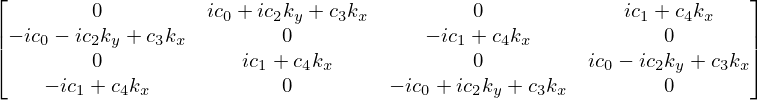

In [3]:
# list of symmetries to impose
symmetries = [Mz, C2y, My, chi, trs]
dim = 2  # Momenta along x and y
power = 1 # Maximum power of momenta
Hk = qsymm.continuum_hamiltonian(symmetries, dim, power, prettify=True)
qsymm.display_family(Hk, summed=True)

### $k^2$ corrections

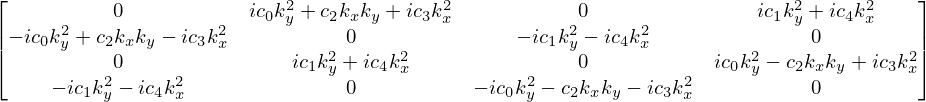

In [5]:
dim = 2
power = 2
Hk2 = qsymm.continuum_hamiltonian(symmetries, dim, power, prettify=True)
# show only the new terms
dH = qsymm.hamiltonian_generator.subtract_family(Hk2, Hk, prettify=True)
qsymm.display_family(dH, summed=True)